In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
#%matplotlib inline

Set scanpy out-files

In [5]:
writeDir = "write/"

fileName = "luadKim"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


Set figure parameters

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

read input file

In [7]:
inDir = 'data/LUAD/Data_Kim2020_Lung'
inputFileMtx = f'{inDir}/Exp_data_UMIcounts.mtx'
inputGenes = f'{inDir}/Genes.txt'
inputBarcodes = f'{inDir}/Cells.csv'
inMetaFile = f'{inDir}/Meta-data.csv'

In [8]:
adata = sc.read_mtx(inputFileMtx).T
adata

AnnData object with n_obs × n_vars = 32493 × 20793

In [9]:
genes = pd.read_csv(inputGenes, header=None,index_col=0)
genes.index.name = None
genes

""
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
ZYG11A
ZYG11B
ZYX
ZZEF1


In [10]:
cells = pd.read_table(inputBarcodes, index_col=0, sep=",")
#cells.index = [f"{cells.loc[i,'sample']}_{cells.loc[i,'cell_name']}" for i in range(len(cells))]
cells

,sample,source,cell_type,subclone,complexity
cell_name,,,,,
AAACCTGAGACGACGT_LUNG_T34,P0034,tLung,B_cell,0,1287
AAACCTGAGACTGTAA_LUNG_T34,P0034,tLung,Malignant,1,5804
AAACCTGAGATGTCGG_LUNG_T31,P0031,tLung,Epithelial,0,1162
AAACCTGAGCCAGGAT_EBUS_28,P1028,tL/B,Malignant,1,1728
AAACCTGAGCGCTTAT_LUNG_T19,P0019,tLung,Macrophage,0,1509
...,...,...,...,...,...
TTTGTCATCGGTGTTA_LUNG_T28,P0028,tLung,NaN,0,1027
TTTGTCATCTGGGCCA_EBUS_06,P1006,tL/B,NaN,0,1128
TTTGTCATCTTACCGC_EBUS_49,P1049,tL/B,T_cell,0,1304


In [13]:
adata.obs = cells
adata.var = genes

In [14]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [17]:
adata

AnnData object with n_obs × n_vars = 32493 × 20793
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity'

In [18]:
meta = pd.read_table(inMetaFile,index_col=0, sep=",")
meta

,technology,n_cells,patient,cancer_type,sex,age,smoking_status,PY,diagnosis_recurrence,disease_extent,...,targeted_rx_response,ICB_exposed,ICB_response,ET_exposed,ET_response,time_end_of_rx_to_sampling,post_sampling_rx_exposed,post_sampling_rx_response,PFS_DFS,OS
sample,,,,,,,,,,,,,,,,,,,,,
P0006,10x,2436,P0006,Lung Adenocarcinoma,NaN,NaN,ex smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0008,10x,2406,P0008,Lung Adenocarcinoma,NaN,NaN,never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0018,10x,2487,P0018,Lung Adenocarcinoma,NaN,NaN,ex smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0019,10x,3127,P0019,Lung Adenocarcinoma,NaN,NaN,smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0020,10x,2245,P0020,Lung Adenocarcinoma,NaN,NaN,smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0025,10x,1827,P0025,Lung Adenocarcinoma,NaN,NaN,ex smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0028,10x,2642,P0028,Lung Adenocarcinoma,NaN,NaN,smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0030,10x,2111,P0030,Lung Adenocarcinoma,NaN,NaN,never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0031,10x,1898,P0031,Lung Adenocarcinoma,NaN,NaN,ex smoker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
meta.columns

Index(['technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age',
       'smoking_status', 'PY', 'diagnosis_recurrence', 'disease_extent',
       'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage', 'sample_primary_met',
       'size', 'site', 'histology', 'genetic_hormonal_features', 'grade',
       'KI67', 'treated_naive', 'chemotherapy_exposed',
       'chemotherapy_response', 'targeted_rx_exposed', 'targeted_rx_response',
       'ICB_exposed', 'ICB_response', 'ET_exposed', 'ET_response',
       'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed',
       'post_sampling_rx_response', 'PFS_DFS', 'OS'],
      dtype='object')

In [24]:
metaInterest = ['smoking_status','disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade']
meta = meta[metaInterest]

In [25]:
addMeta = pd.DataFrame([meta.loc[samp].values for samp in adata.obs["sample"]], columns = metaInterest, index = adata.obs.index)
adata.obs = adata.obs.join(addMeta)

# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


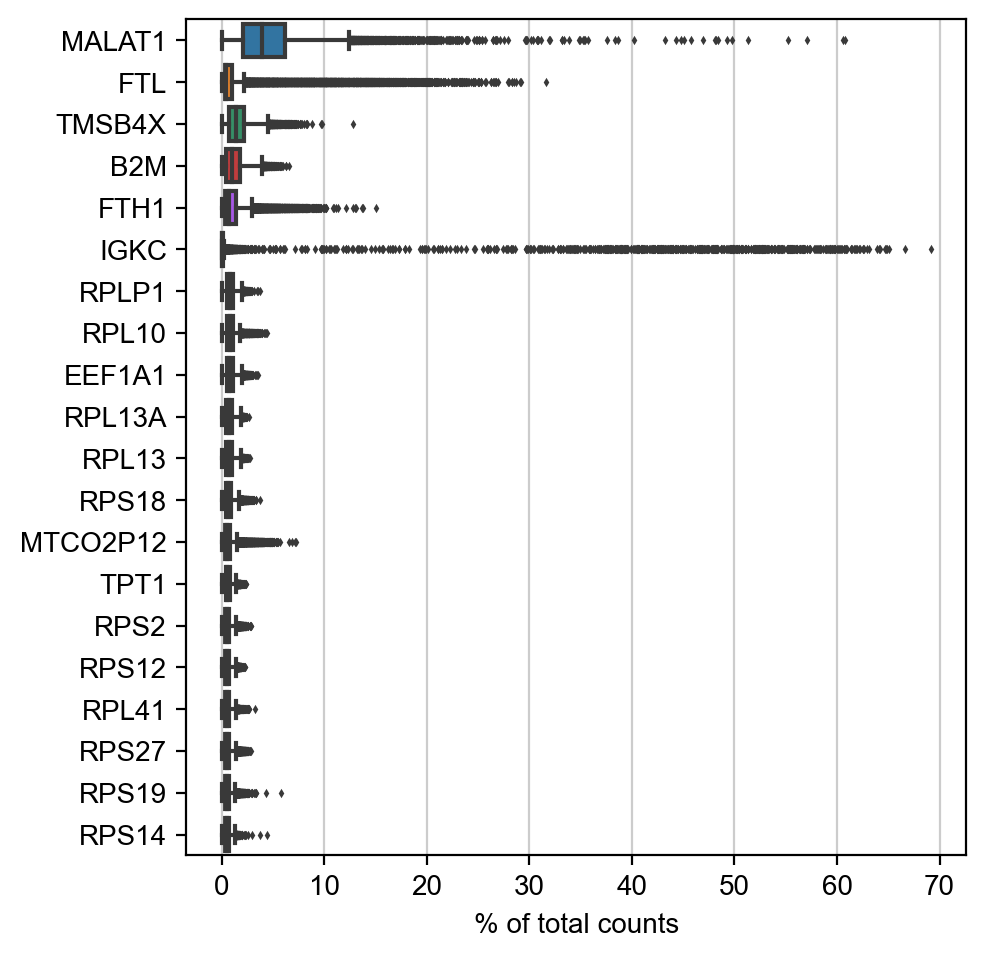

In [26]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_62235/1788950408.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


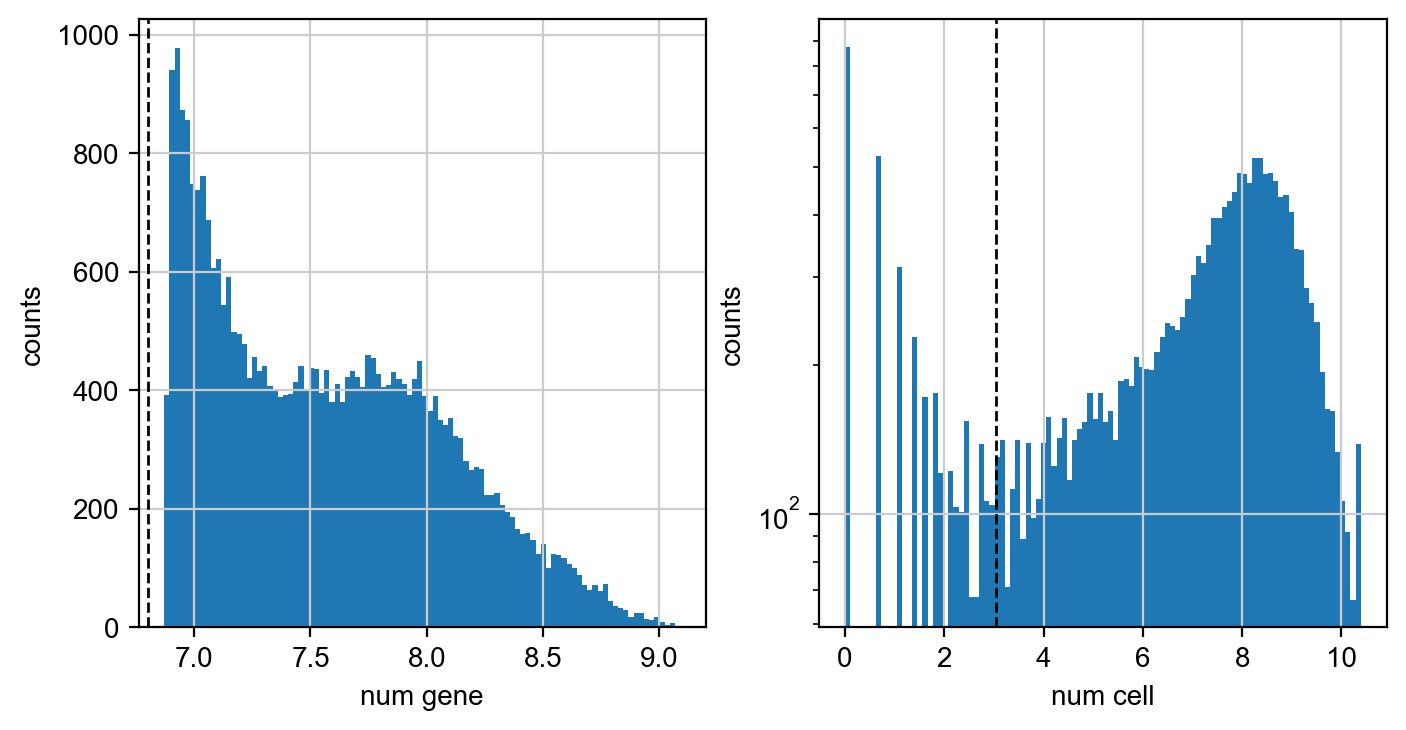

In [29]:
valX = adata.X>0
minGenes=900
minCells=20

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [30]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 3377 genes that are detected in less than 20 cells


In [31]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [41]:
#for g in adata.var_names:
#    if ("-" in g):
#        print(g)

In [42]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

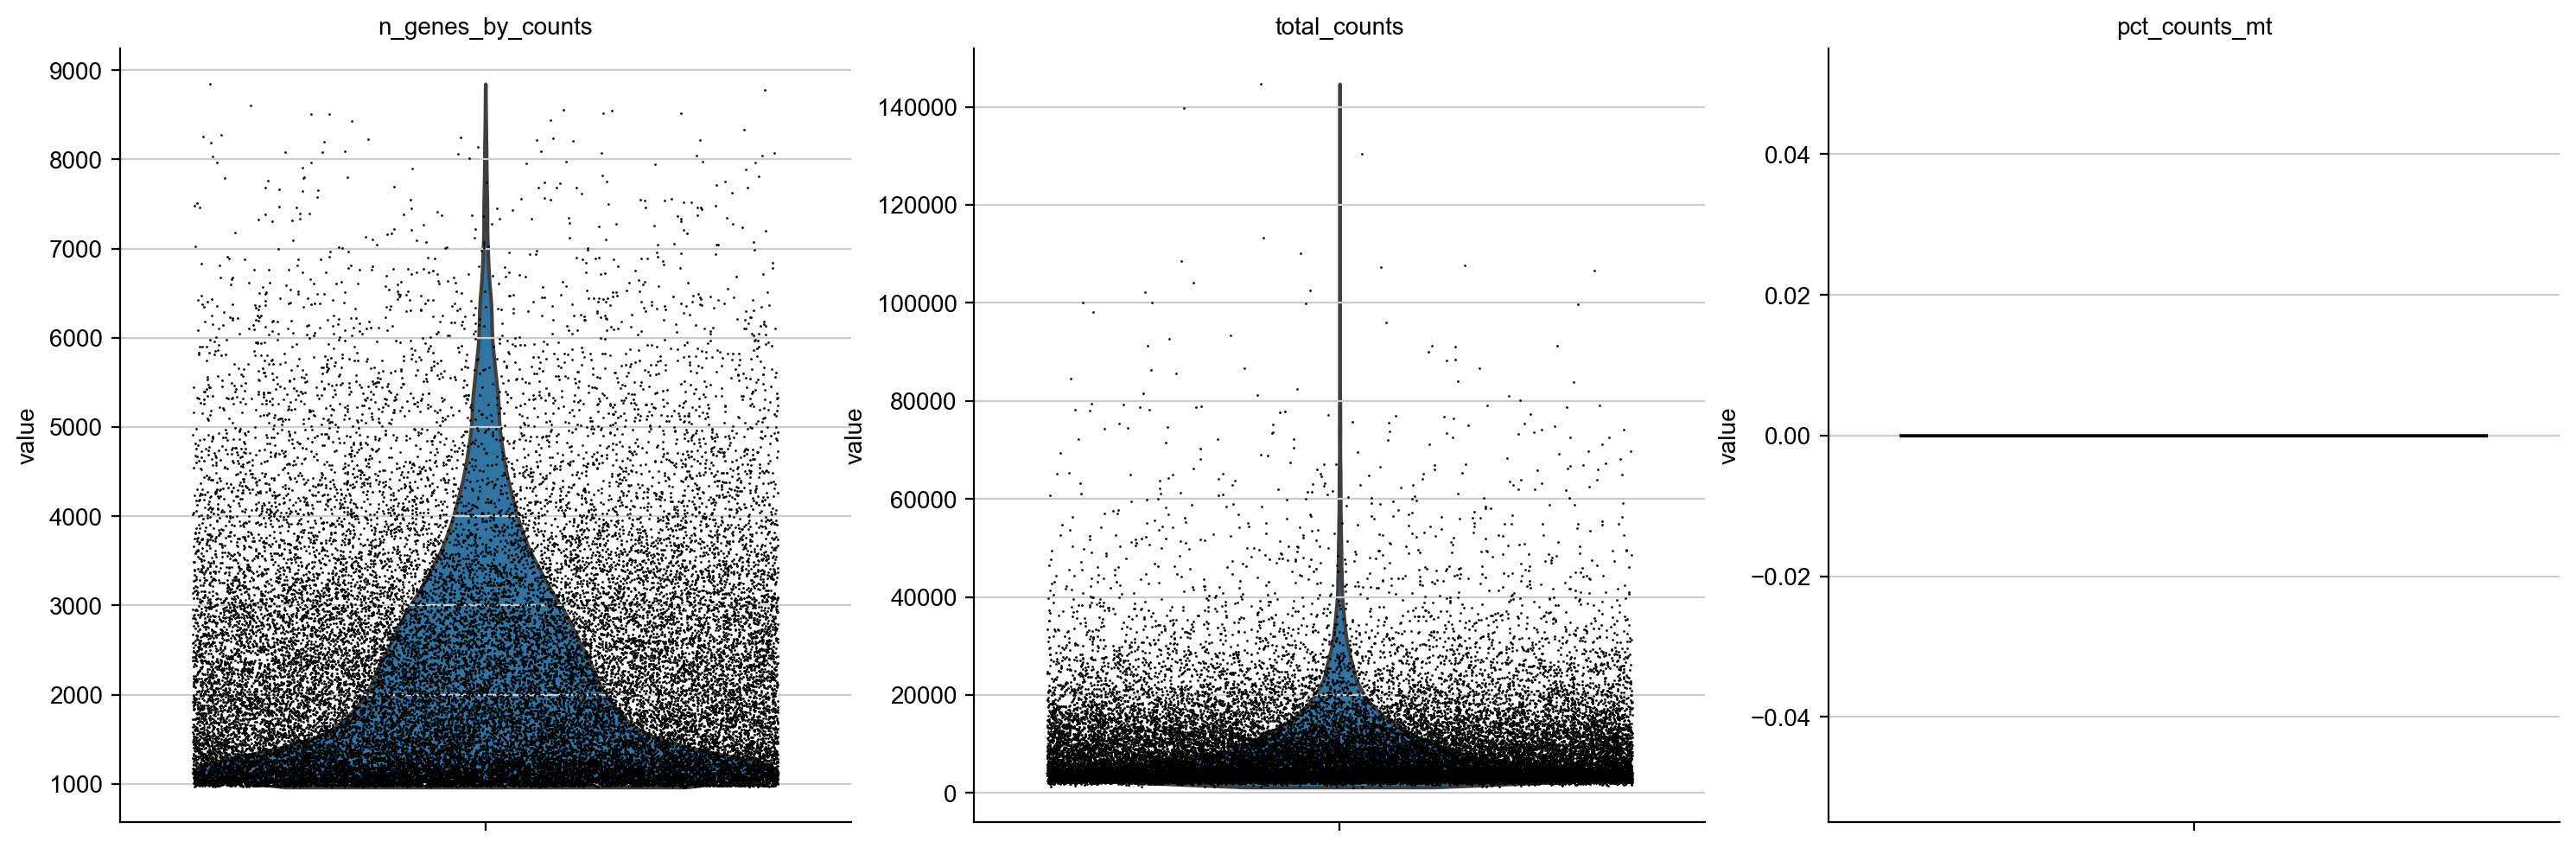

In [43]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

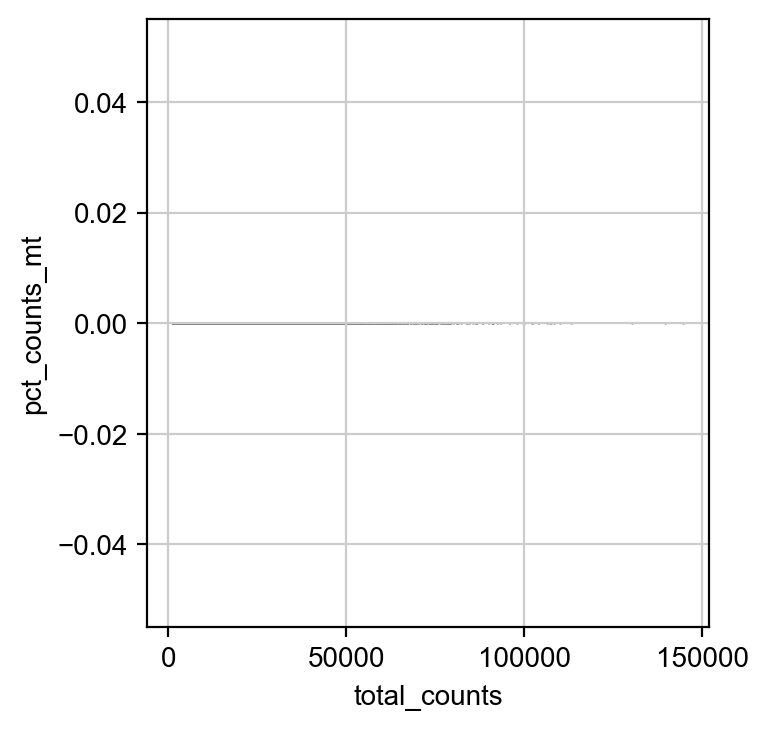

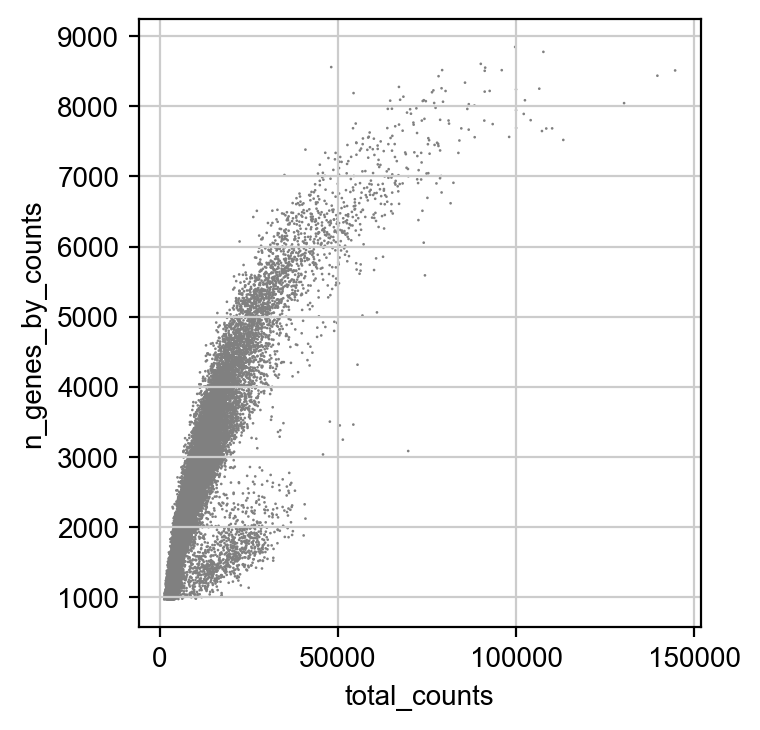

In [44]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [50]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.total_counts < 30000, :]
#adata = adata[adata.obs.pct_counts_mt < 20, :]

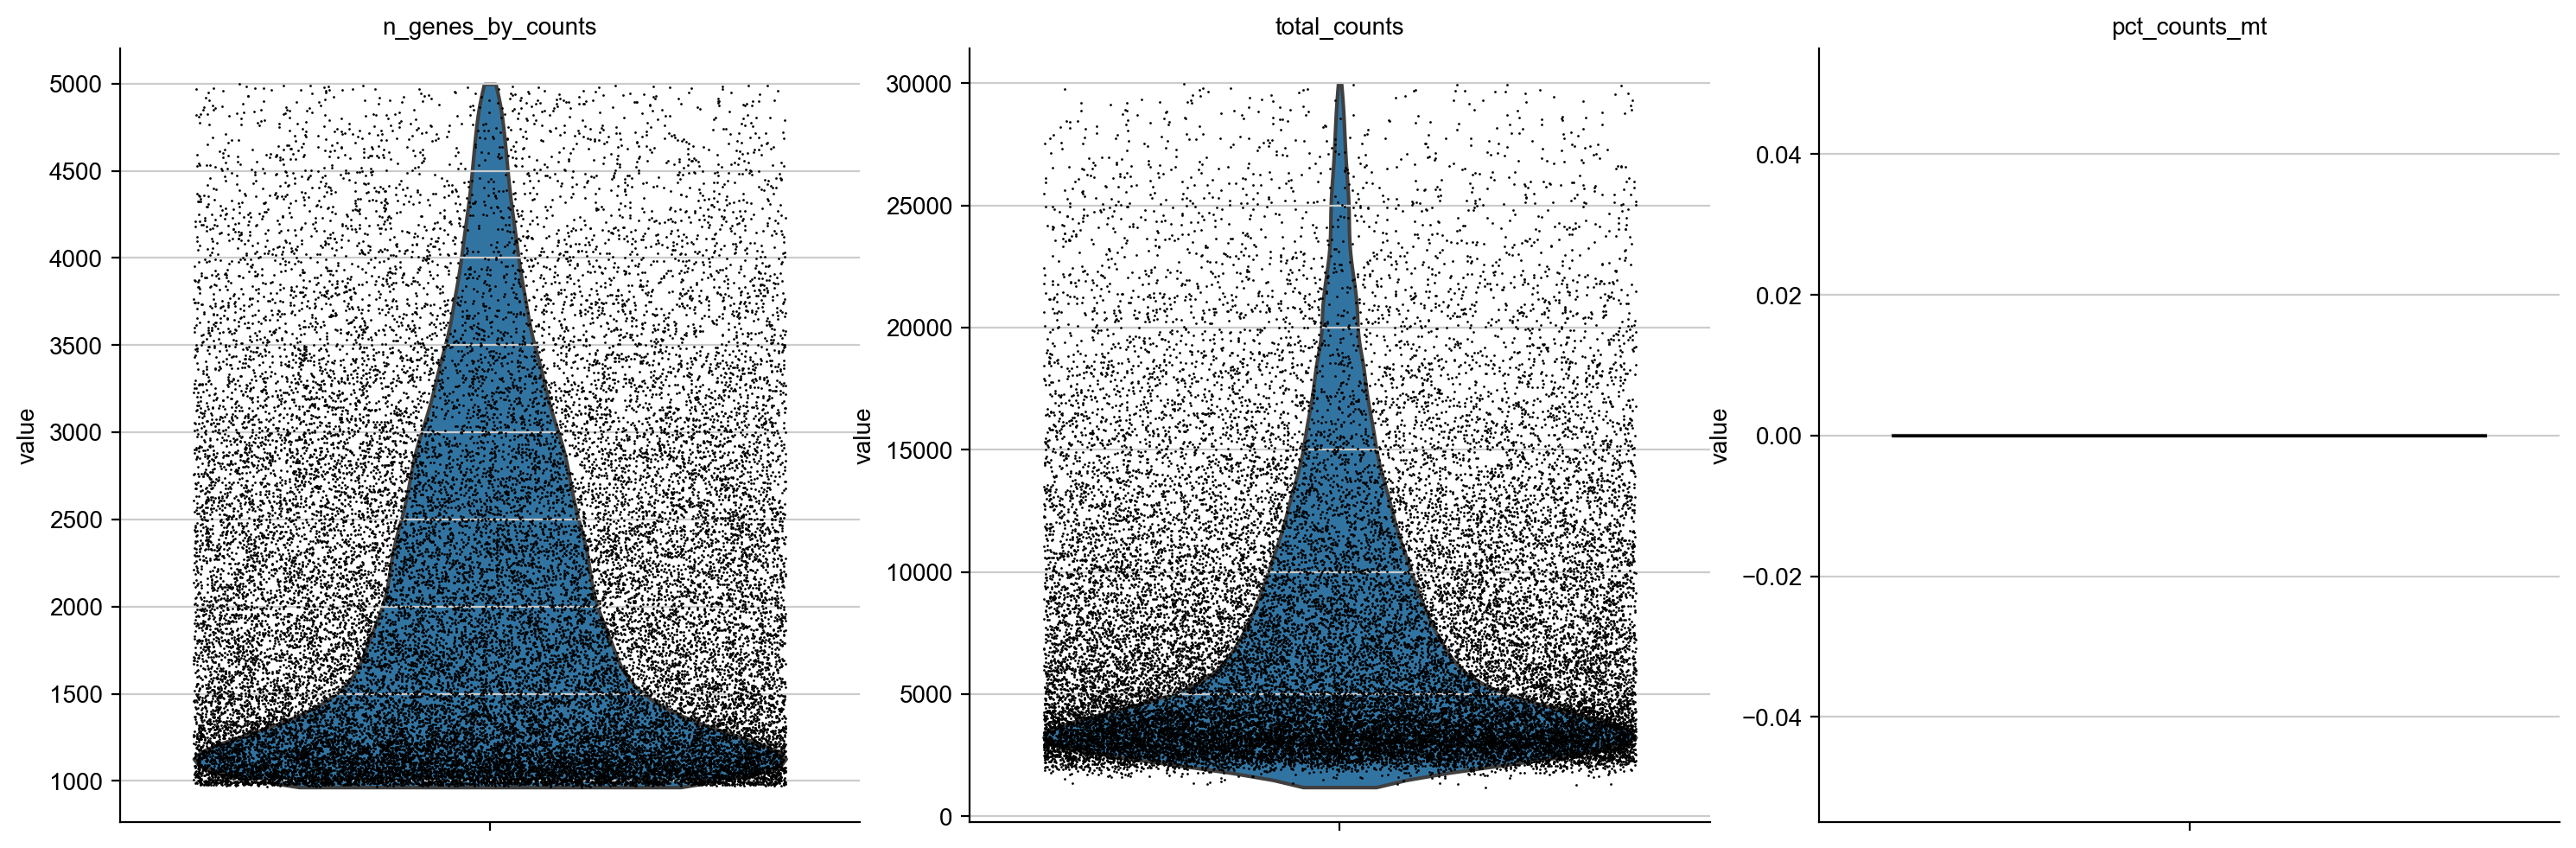

In [51]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

save post QC scanpy

In [52]:
adata

View of AnnData object with n_obs × n_vars = 30946 × 17415
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity', 'smoking_status', 'disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [53]:
#adata = adata[adata.obs["injury"]=="Day 0"]
#adata

In [54]:
resultsFileQC

'write/luadKim_QC.h5ad'

In [55]:
adata.write(resultsFileQC)